In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [ ]:
train_x = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_x = train_x.astype('float32')/255
test_x = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_x = test_x.astype('float32')/255

train_y = tf.keras.utils.to_categorical(train_labels)
test_y = tf.keras.utils.to_categorical(test_labels)
print(train_y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs=50, batch_size=512,validation_data=(test_x,test_y))
model.save("mnist.h5")

Epoch 1/50
118/118 [==============================] - 2s 13ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0355 - val_accuracy: 0.9902
Epoch 2/50
118/118 [==============================] - 1s 12ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0316 - val_accuracy: 0.9904
Epoch 3/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0350 - val_accuracy: 0.9900
Epoch 4/50
118/118 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0301 - val_accuracy: 0.9914
Epoch 5/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0325 - val_accuracy: 0.9918
Epoch 6/50
118/118 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0372 - val_accuracy: 0.9909
Epoch 7/50
118/118 [==============================] - 1s 10ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0331 - val_accuracy: 0.9919

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
flatbuffer_size = open("mnist.tflite", "wb").write(tflite_model)

print('The size of the converted flatbuffer is: %d bytes' % flatbuffer_size)


The size of the converted flatbuffer is: 377312 bytes


In [ ]:
!apt-get -qq install xxd
!xxd -i mnist.tflite > mnist.cc


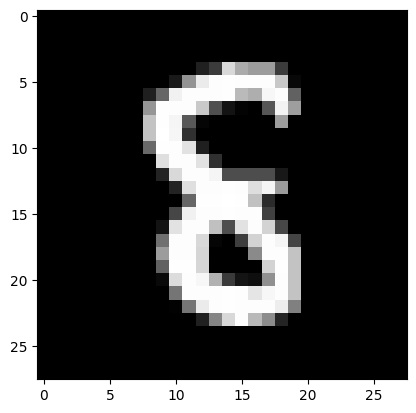

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1/1 [==============================] - 0s 20ms/step
8
(784,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
test = test_x[232]

fig = plt.figure
plt.imshow(test, cmap='gray')
plt.show()

print(test_y[232])
test = test.reshape(-1,28,28,1)
print(np.argmax(model.predict(test)))


test_1 = test.reshape(28,28)
array = test_1.flatten()
print(array.shape)
# result_string = ",".join(map(str, array))
# print(result_string)


# 预测自己手写的

(28, 28, 1)
1/1 [==============================] - 0s 57ms/step
[[7.8209581e-14 2.4089399e-11 1.0000000e+00 1.3491262e-12 4.4920764e-12
  1.7890266e-17 6.5067170e-19 8.7419078e-16 5.5471360e-11 9.6178145e-14]]
预测数字： 2
预测概率： [[7.8209581e-14 2.4089399e-11 1.0000000e+00 1.3491262e-12 4.4920764e-12
  1.7890266e-17 6.5067170e-19 8.7419078e-16 5.5471360e-11 9.6178145e-14]]


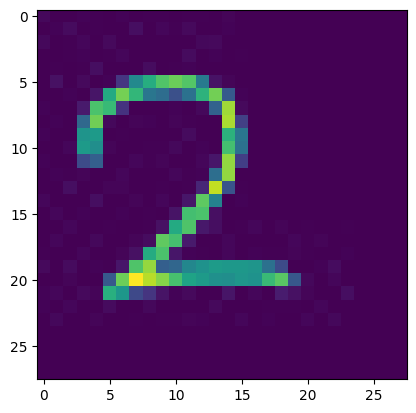

In [ ]:

img=tf.keras.preprocessing.image.load_img("/content/3.jpg",target_size=(28, 28),color_mode="grayscale")
img=tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)

img=img.astype('float32')/255
plt.imshow(img)

img=img.reshape((1,28,28,1))
y_pred = model.predict(img)

print(y_pred)
print('预测数字：',np.argmax(y_pred, axis=1)[0])
print('预测概率：',y_pred)
